In [3]:
from image_helpers_tfr import *
import os
from tqdm import tqdm
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Load the listings and extract the price

In [4]:
url_listing = "http://data.insideairbnb.com/ireland/leinster/dublin/2021-11-07/data/listings.csv.gz"
listings = pd.read_csv(url_listing)
prefix = "https://airbnb.de"
suffix = "/photos"
urls = listings["listing_url"]
ids = listings["id"]
price = listings["price"]
price = price.str.replace("$","")
price = price.str.replace(",","")
price = price.astype(float)
price = pd.DataFrame(price)
price["log_price"] = np.log(price)
price["id"] = listings["id"]
price = price[["id", "price", "log_price"]]

/var/folders/97/j215pw6x7sq158bvx1ktlhf80000gn/T/ipykernel_17682/473737221.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  price = price.str.replace("$","")


Set the path to the downloaded and resized images

In [5]:
folder_images = "data/images_resized"
#folder_tfrecord= "data/tfrecord_id"
folder_tfrecord= "data/tfrecord_id_first"
img_path = os.listdir(folder_images)

Set up a dataframe which contains the listing id the number of the image for the id and its corresponding path alongside with the log-price

In [6]:
# separate id and image number
df = pd.Series(img_path).str.split("_", expand = True)
df.columns = ["listing_id", "img_no"]
listing_id = df["listing_id"]

df = df["img_no"].str.split(".", expand = True)
df.columns = ["img_no", "png"]
image_no = df["img_no"]

# build dataframe with id, img number and path to the image
data = pd.DataFrame({"id": listing_id, "img_no": image_no, "path": img_path})



In [7]:
# join prices 
price["id"] = price["id"].astype(int)
data["id"] = data["id"].astype(int)
df_compl = data.merge(price, how = "left", on = "id")
df_compl["id"] = df_compl["id"].astype(str)

Next, write tf-record files which contain the images and prices for each id

In [8]:
unique_ids = np.unique(df_compl["id"])

In [43]:
for id in tqdm(unique_ids):
    filter = df_compl["id"] == id
    data_to_write = df_compl[filter]
    # for computational reasons, only take first picture
    data_to_write = data_to_write[data_to_write["img_no"]=="0"]
    filename = folder_tfrecord +"/"+ id
    write_features(data_to_write["id"].values, data_to_write["path"].values, data_to_write["log_price"].values, path = folder_images+"/", filename = filename)


100%|██████████| 1/1 [00:00<00:00, 44.40it/s]

100%|██████████| 1/1 [00:00<00:00, 53.79it/s]

100%|██████████| 1/1 [00:00<00:00, 29.13it/s]

100%|██████████| 1/1 [00:00<00:00, 34.10it/s]

100%|██████████| 1/1 [00:00<00:00, 45.82it/s]

100%|██████████| 1/1 [00:00<00:00, 51.04it/s]

100%|██████████| 1/1 [00:00<00:00, 49.52it/s]

100%|██████████| 1/1 [00:00<00:00, 47.33it/s]

100%|██████████| 1/1 [00:00<00:00, 37.57it/s]

100%|██████████| 1/1 [00:00<00:00, 94.72it/s]

100%|██████████| 1/1 [00:00<00:00, 42.16it/s]

100%|██████████| 1/1 [00:00<00:00, 37.91it/s]

100%|██████████| 1/1 [00:00<00:00, 42.27it/s]

100%|██████████| 1/1 [00:00<00:00, 42.63it/s]

100%|██████████| 1/1 [00:00<00:00, 41.02it/s]

100%|██████████| 1/1 [00:00<00:00, 73.42it/s]

100%|██████████| 1/1 [00:00<00:00, 45.72it/s]

100%|██████████| 1/1 [00:00<00:00, 46.84it/s]

100%|██████████| 1/1 [00:00<00:00, 57.35it/s]

100%|██████████| 1/1 [00:00<00:00, 58.01it/s]

100%|██████████| 1/1 [00:00<00:00, 57.81it/s]

100%|████████

Split data in training, test and validation ids, store corresponding tf-record data and create datasets

In [9]:
X_train, X_test = train_test_split(unique_ids, test_size=0.2, random_state=1)

X_train, X_val = train_test_split(X_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [10]:
X_train = [folder_tfrecord + "/" + f + ".tfr" for f in X_train.astype(str)]
X_test = [folder_tfrecord + "/" + f + ".tfr" for f in X_test.astype(str)]
X_val = [folder_tfrecord + "/" + f + ".tfr" for f in X_val.astype(str)]

In [11]:
train_dataset = make_dataset(X_train, batch_size = 10)
test_dataset = make_dataset(X_test, batch_size = 10)
val_dataset = make_dataset(X_val, batch_size = 10)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `

In [12]:
basemodel = tf.keras.applications.efficientnet.EfficientNetB0(
    include_top=False, weights='imagenet', pooling = "avg", input_tensor = tf.keras.layers.Input(shape = (256, 256, 3), name = "input_1")
)
basemodel.trainable = False

outputs = tf.keras.layers.Dense(100, activation = "relu")(basemodel.output)
outputs = tf.keras.layers.Dense(1)(outputs)

model = tf.keras.Model(basemodel.input, outputs)

model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.0001),
              loss=tf.keras.losses.MeanSquaredError())
model.fit(train_dataset)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2021-12-29 13:17:45.983243: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-12-29 13:17:45.983782: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


    378/Unknown - 115s 299ms/step - loss: 6.0016

In [1]:
model_builder = model

preprocess_input = keras.applications.efficientnet.preprocess_input

last_conv_layer_name = "top_conv"

# The local path to our target image"
img_path = "data/images_resized/44077_1.png"

display(Image(img_path))

NameError: name 'model' is not defined

In [14]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[[7.352597]]


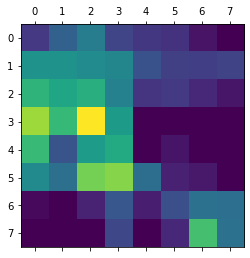

In [15]:
img_size = (256,256)
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
#model = model_builder(weights="imagenet")

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
print(preds)

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

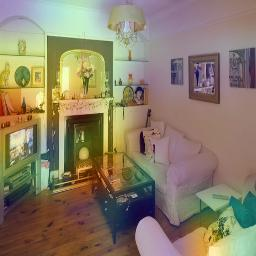

In [16]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

# Make collage of first 9 pictures

In [14]:
df_compl["img_no"].astype(int)

0        12
1         6
2        21
3         0
4        13
         ..
86440     6
86441    10
86442     6
86443     6
86444     5
Name: img_no, Length: 86445, dtype: int64

In [11]:
df_collage = df_compl[df_compl["img_no"].astype(int)<=8]
df_unique = df_collage[["id", "log_price"]]
df_unique = df_unique.drop_duplicates()
unique_ids = df_unique["id"].astype(str)
unique_price = df_unique["log_price"]
img_stacked = []


Save collage images

In [ ]:
for id in tqdm(unique_ids):
    filter = df_collage["id"] == id
    paths = df_collage["path"][filter]
    img_tmp = []
    print(paths)
    for p in paths:
        img_tmp.append(cv2.imread("data/images_resized/"+p))

    img_tmp = np.hstack(img_tmp)
    cv2.imwrite("data/image_collage/"+id+".png", img_tmp)




Create train, test, val data from collages

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df_unique["id"].values, df_unique["log_price"].values, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

Write tfr-files for each of the sets

In [22]:
write_features(X_train, X_train+".png", y_train, path = "data/image_collage/", filename = "data/tfrecord_collage/train_collage")

write_features(X_val, X_val+".png", y_val, path = "data/image_collage/", filename = "data/tfrecord_collage/val_collage")

write_features(X_test, X_test+".png", y_test, path = "data/image_collage/", filename = "data/tfrecord_collage/test_collage")

100%|██████████| 1263/1263 [02:54<00:00,  7.24it/s]


1263

In [29]:
val_dataset = make_dataset("data/tfrecord_id/44077.tfr", batch_size = 1).batch(1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [11]:
train_dataset = make_dataset("data/tfrecord_collage/train_collage.tfr", batch_size = 1).batch(1)
test_dataset = make_dataset("data/tfrecord_collage/test_collage.tfr", batch_size = 1).batch(1)
val_dataset = make_dataset("data/tfrecord_collage/val_collage.tfr", batch_size = 1).batch(1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `

In [41]:
inputs = tf.keras.layers.Input(shape = (None, None, 3), name = "input_1")
inputs = keras.applications.efficientnet.preprocess_input(inputs)
basemodel = tf.keras.applications.efficientnet.EfficientNetB0(
    include_top=False, weights='imagenet', pooling = "avg", input_tensor = inputs)
basemodel.trainable = False

outputs = tf.keras.layers.Flatten()(basemodel.output)
outputs = tf.keras.layers.Dense(200, activation = "relu")(outputs)
outputs = tf.keras.layers.Dense(1000, activation = "relu")(outputs)

outputs = tf.keras.layers.Dense(1)(outputs)


model = tf.keras.Model(inputs, outputs)

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.00001),
              loss="mean_squared_error", metrics=["mean_squared_error"])
model.fit(test_dataset)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1263/1263 [==============================] - 455s 358ms/step - loss: 3.9079 - mean_squared_error: 3.9079


In [44]:
model.trainable_variables

[<tf.Variable 'dense_23/kernel:0' shape=(1280, 200) dtype=float32, numpy=
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)>,
 <tf.Variable 'dense_23/bias:0' shape=(200,) dtype=float32, numpy=
 array([-0.00522871,  0.        , -0.00600546, -0.00600544,  0.        ,
         0.        , -0.00796223, -0.00600514, -0.00600547,  0.0120239 ,
         0.        , -0.00693853, -0.00516129,  0.00729852,  0.01252253,
         0.        ,  0.00597012, -0.00600533,  0.        ,  0.        ,
        -0.00602248,  0.        ,  0.01250271,  0.01249504,  0.        ,
         0.        , -0.00600517,  0.        , -0.00810508, -0.0060054 ,
         0.        ,  0.00621634,  0.00516137,  0.        ,  0.        ,
        -0.00600501,  0.        ,  0.        , 

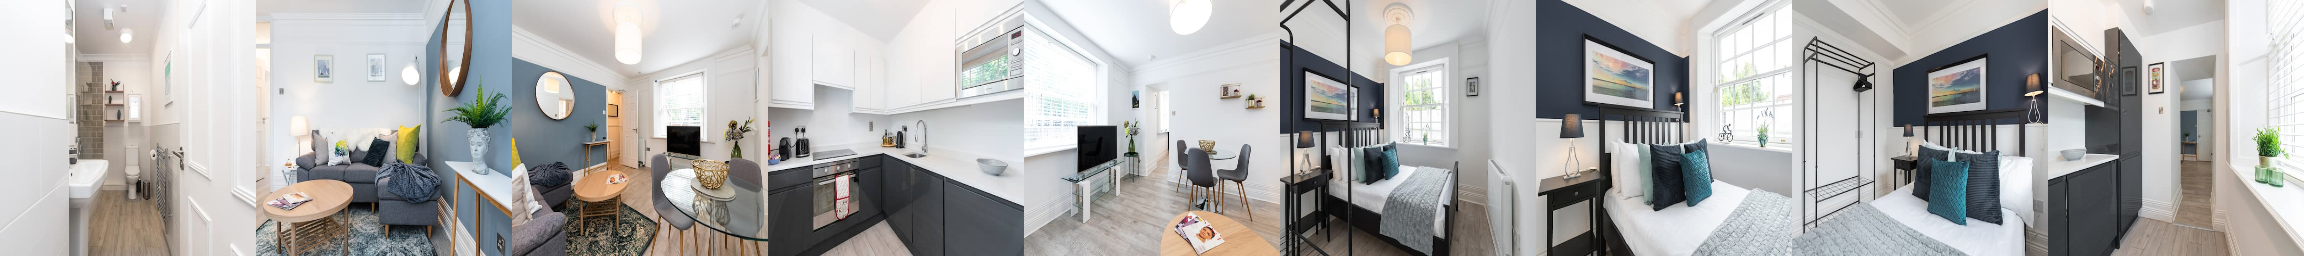

In [32]:
model_builder = model

preprocess_input = keras.applications.efficientnet.preprocess_input

last_conv_layer_name = "top_conv"

# The local path to our target image"
img_path = "data/image_collage/53140691.png"

display(Image(img_path))

In [33]:
w, h, d = cv2.imread(img_path).shape

[[2.2547915]]


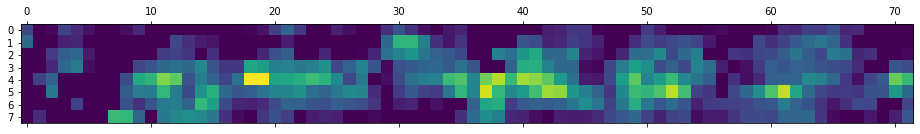

In [40]:

img_size = (w,h)
img_array = get_img_array(preprocess_input(img_path), size=img_size)
# Make model
#model = model_builder(weights="imagenet")

# Remove last layer's softmax
#model.layers[-2].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
print(preds)

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

In [39]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]

    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

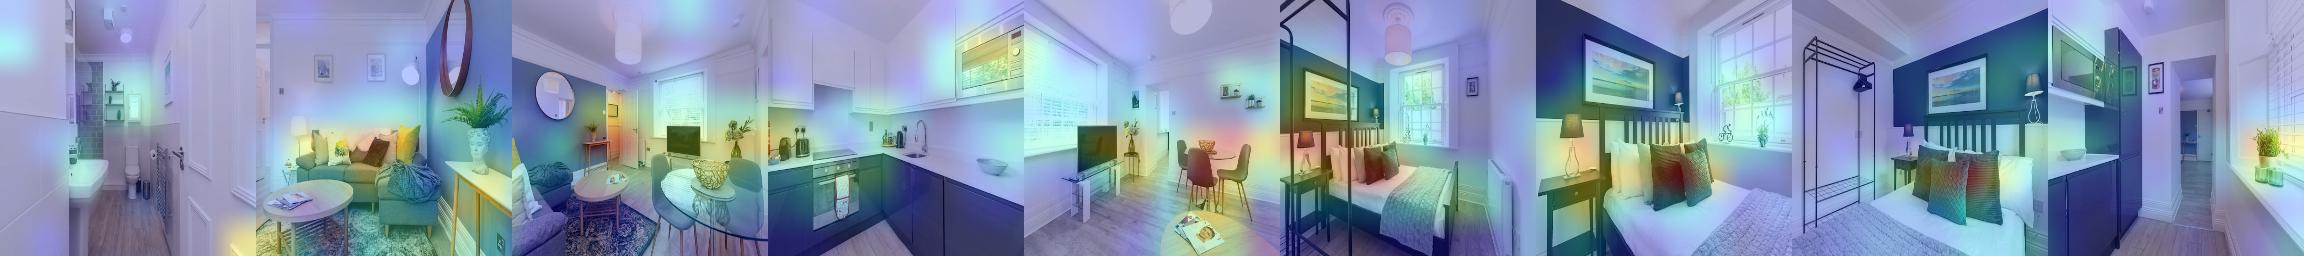

In [38]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)
    
    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)